In [1]:
import glob
import os
from pathlib import Path
from collections import defaultdict

import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
def find_csv_files(log_dir, algos, filename) -> list[Path]:
    # Matches …/<SEED>/debug/**/finetuning_eval.csv  (depth under debug doesn't matter)
    
    csv_files = dict()
    for algo, env_name, exp_log_dir in algos:
        pattern = os.path.join(log_dir, algo, exp_log_dir, "*", "debug", "**", filename)
        files = [p for p in glob.glob(pattern, recursive=True)]
        if env_name not in csv_files:
            csv_files[env_name] = {algo: files}
        else:
            csv_files[env_name][algo] = files 
    return csv_files


log_dir = "/n/fs/rl-chongyiz/exp_logs/ogbench_logs"
algos = [
    # ("sarsa_ifql_vib_gpi_offline2offline", "cheetah_run", "20250504_sarsa_ifql_vib_gpi_offline2offline_cheetah_run_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.15_latent_dim=128"),
    # ("fb_repr_fom_offline2offline", "cheetah_run", "20250507_fb_repr_fom_offline2offline_cheetah_run_obs_norm_type=normal_repr_alpha=10.0_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_clip_fg=True"),

    # ("sarsa_ifql_vib_gpi_offline2offline", "quadruped_jump", "20250504_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.005_latent_dim=128"),
    # ("fb_repr_fom_offline2offline", "quadruped_jump", "20250507_fb_repr_fom_offline2offline_quadruped_jump_obs_norm_type=normal_repr_alpha=1.0_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_clip_fg=True"),

    # ("sarsa_ifql_vib_gpi_offline2offline", "walker_walk", "20250504_sarsa_ifql_vib_gpi_offline2offline_walker_walk_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.05_latent_dim=128"),
    # ("fb_repr_fom_offline2offline", "walker_walk", "20250507_fb_repr_fom_offline2offline_walker_walk_obs_norm_type=normal_repr_alpha=1.0_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_clip_fg=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "walker_flip", "20250508_sarsa_ifql_vib_gpi_offline2offline_walker_flip_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_actor_ln=False_kl_weight=0.05_latent_dim=64_clip_fg=True"),
    ("fb_repr_fom_offline2offline", "walker_flip", "20250512_fb_repr_fom_offline2offline_walker_flip_obs_norm_type=normal_repr_alpha=1.0_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_latent_dim=64_clip_fg=True"),
    ("hilp_fom_offline2offline", "walker_flip", "20250512_hilp_fom_offline2offline_walker_flip_obs_norm_type=normal_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_latent_dim=64_clip_fg=True"),
    
    ("sarsa_ifql_vib_gpi_offline2offline", "quadruped_jump", "20250504_sarsa_ifql_vib_gpi_offline2offline_quadruped_jump_obs_norm=normal_alpha=0.3_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.005_latent_dim=128"),
    ("fb_repr_fom_offline2offline", "quadruped_jump", "20250512_fb_repr_fom_offline2offline_quadruped_jump_obs_norm_type=normal_repr_alpha=10.0_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_latent_dim=128_clip_fg=True"),
    ("hilp_fom_offline2offline", "quadruped_jump", "20250512_hilp_fom_offline2offline_quadruped_jump_obs_norm_type=normal_alpha=0.3_num_fg=16_expectile=0.9_actor_freq=4_latent_dim=128_clip_fg=True"),

    ("sarsa_ifql_vib_gpi_offline2offline", "cube-double-play-singletask-task1-v0", "20250508_sarsa_ifql_vib_gpi_offline2offline_cube-double-play-singletask-task1-v0_obs_norm=normal_alpha=30.0_num_fg=16_actor_freq=4_expectile=0.9_critic_z_type=prior_vf_time_emb=False_transition_ln=True_kl_weight=0.025_latent_dim=128_clip_fg=True"),
    ("fb_repr_fom_offline2offline", "cube-double-play-singletask-task1-v0", "20250512_fb_repr_fom_offline2offline_cube-double-play-singletask-task1-v0_obs_norm_type=normal_repr_alpha=100.0_alpha=30.0_num_fg=16_expectile=0.9_actor_freq=4_latent_dim=128_clip_fg=True"),
    ("hilp_fom_offline2offline", "cube-double-play-singletask-task1-v0", "20250512_hilp_fom_offline2offline_cube-double-play-singletask-task1-v0_obs_norm_type=normal_alpha=30.0_num_fg=16_expectile=0.9_actor_freq=4_latent_dim=128_clip_fg=True"),
    
    ("sarsa_ifql_vib_gpi_offline2offline", "scene-play-singletask-task1-v0", "20250509_sarsa_ifql_vib_gpi_offline2offline_scene-play-singletask-task1-v0_obs_norm=normal_alpha=300.0_num_fg=16_actor_freq=4_expectile=0.99_critic_z_type=prior_vf_time_emb=False_actor_ln=False_kl_weight=0.2_latent_dim=128_clip_fg=True"),
    ("fb_repr_fom_offline2offline", "scene-play-singletask-task1-v0", "20250512_fb_repr_fom_offline2offline_scene-play-singletask-task1-v0_obs_norm_type=normal_repr_alpha=10.0_alpha=300.0_num_fg=16_expectile=0.99_actor_freq=4_latent_dim=128_clip_fg=True"),
    ("hilp_fom_offline2offline", "scene-play-singletask-task1-v0", "20250512_hilp_fom_offline2offline_scene-play-singletask-task1-v0_obs_norm_type=normal_alpha=300.0_num_fg=16_expectile=0.99_actor_freq=4_latent_dim=128_clip_fg=True"),
]

env_name_maps = {
    'cheetah_run': 'cheetah run',
    'quadruped_jump': 'quadruped jump',
    'walker_walk': 'walker walk',
    'walker_flip': 'walker flip',
    'cube-double-play-singletask-task1-v0': 'cube double task 1',
    'scene-play-singletask-task1-v0': 'scene task 1',
}
algo_name_maps = {
    'sarsa_ifql_vib_gpi_offline2offline': 'InFOM (Ours)',
    'fb_repr_fom_offline2offline': 'FB + FOM',
    'hilp_fom_offline2offline': 'HILP + FOM',
}


csv_files = find_csv_files(log_dir, algos, filename="finetuning_eval.csv")

In [3]:
def load_data(csv_path, stat_name, step_name) -> np.ndarray:
    df = pd.read_csv(csv_path)
    if stat_name not in df.columns:
        raise KeyError(f"{csv_path} doesn't contain {stat_name}")
    x = df[step_name].values
    y = df[stat_name].values
    return dict(x=x, y=y)


algo_data = defaultdict(dict)
for env_name, env_csv_files in csv_files.items():
    for algo, csv_files in env_csv_files.items():
        seed_data = []
        for csv_file in csv_files:
            if 'singletask' in csv_file:
                data = load_data(csv_file, "evaluation/episode.success", "step")
            else:
                data = load_data(csv_file, "evaluation/episode.return", "step")
            if len(seed_data) == 0:
                seed_data.append(data["x"])
            else:
                assert np.all(data["x"] == seed_data[0])
            seed_data.append(data["y"])

        seed_data = np.asarray(seed_data)
        # steps = seed_data[0]
        # data = seed_data[1:]
        
        algo_data[env_name_maps[env_name]][algo_name_maps[algo]] = seed_data
        if len(seed_data) == 1:
            print("Warning: only one random seed!")

In [4]:
print(algo_data['walker flip']['InFOM (Ours)'][0].shape)
print(algo_data['walker flip']['InFOM (Ours)'][1:].shape)

(11,)
(5, 11)


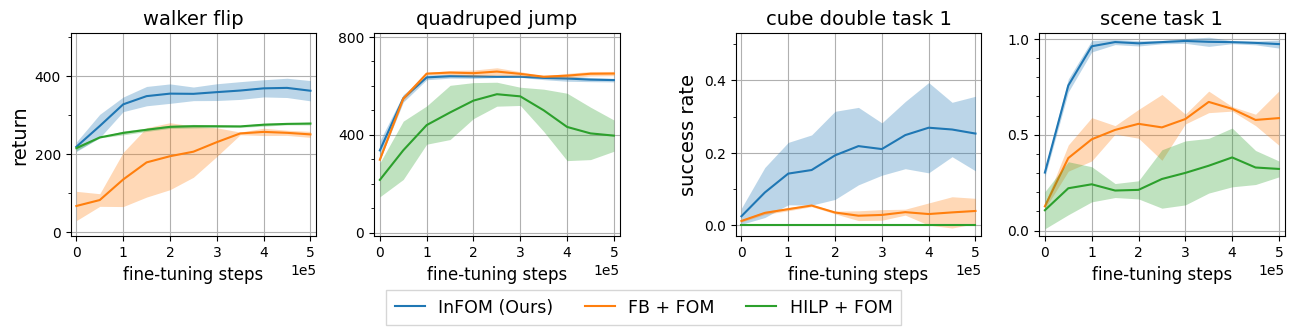

In [ ]:
# fig, axes = plt.subplots(1, 4, figsize=(16, 3.2), gridspec_kw=dict(wspace=0.16, hspace=0.5))
fig, axes = plt.subplots(1, 5, figsize=(13, 3.2), gridspec_kw={'width_ratios': [0.7, 0.7, 0.001, 0.7, 0.7]})
fig.subplots_adjust(wspace=0.01)
# fig.tight_layout(rect=(-0.1, 0.2, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.tight_layout(rect=(0.01, 0.16, 1.02, 0.98))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)

axes[2].axis('off')
axes = [axes[0], axes[1], axes[3], axes[4]]

for (env_name, env_data), ax in zip(algo_data.items(), axes):
    for algo, data in env_data.items():
        x = data[0] - 1e6
        y = data[1:]
        y = gaussian_filter1d(y, 0.75)
        y_mean = np.mean(y, axis=0)
        y_std = np.std(y, axis=0, ddof=1)
        
        l, = ax.plot(x, y_mean, label=algo, zorder=3)
        ax.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.3, lw=0, color=l.get_color(), zorder=3)

    if ax == axes[0]:
        ax.set_ylabel('return', fontsize=14)
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-10, 500 + 10])
        ax.set_yticks([0, 200, 400])
        ax.yaxis.set_minor_locator(MultipleLocator(100))
        
        ax.legend(bbox_to_anchor=(1.25, -0.22),
            loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
            shadow=False, fontsize=12.5, borderpad=0.5, handlelength=1.7, ncol=3)
    if ax == axes[1]:
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-15, 800 + 15])
        ax.set_yticks([0, 400, 800])
        ax.yaxis.set_minor_locator(MultipleLocator(100))
    if ax == axes[2]:
        ax.set_ylabel('success rate', fontsize=14)
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-0.03, 0.5 + 0.03])
        ax.set_yticks([0.0, 0.2, 0.4])
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    if ax == axes[3]:
        ax.set_xlim([-1.25e4, 5e5 + 1.25e4])
        ax.set_ylim([-0.03, 1.0 + 0.03])
        ax.set_yticks([0.0, 0.5, 1.0])
        ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    
    ax.set_title(env_name, fontsize=14)
    ax.xaxis.set_major_locator(MultipleLocator(1e5))
    ax.set_xlabel('fine-tuning steps', fontsize=12)
    ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))  
    
    ax.grid(zorder=3)     

# [left, bottom, width, height]
# axes[1].set_position([0.1, 0.5, 0.4, 0.4])  # Adjust the position of this subplot

# fig.tight_layout(rect=(-0.1, 0.2, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/intention_encoding_ablation_lc.pdf"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()


env = walker flip, InFOM (Ours): mean = 367.6713, std = 21.1020
env = walker flip, FB + FOM: mean = 253.8106, std = 7.1819
env = walker flip, HILP + FOM: mean = 278.0506, std = 4.5412
env = quadruped jump, InFOM (Ours): mean = 626.0349, std = 6.8158
env = quadruped jump, FB + FOM: mean = 647.4752, std = 12.0109
env = quadruped jump, HILP + FOM: mean = 402.4222, std = 88.0037
env = cube double task 1, InFOM (Ours): mean = 0.2627, std = 0.0888
env = cube double task 1, FB + FOM: mean = 0.0333, std = 0.0377
env = cube double task 1, HILP + FOM: mean = 0.0000, std = 0.0000
env = scene task 1, InFOM (Ours): mean = 0.9783, std = 0.0100
env = scene task 1, FB + FOM: mean = 0.5900, std = 0.0519
env = scene task 1, HILP + FOM: mean = 0.3556, std = 0.0990


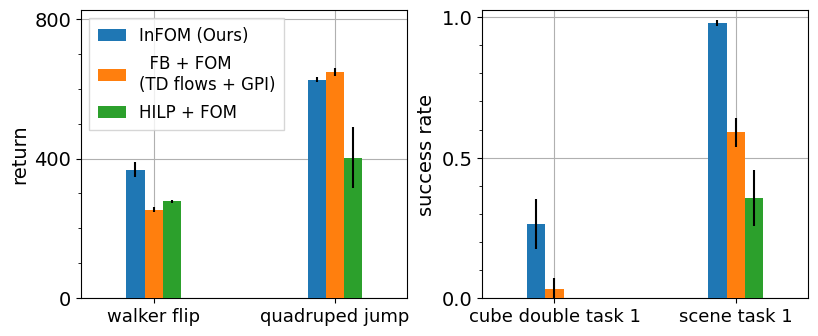

In [5]:
for env_name, env_data in algo_data.items():
    for algo, data in env_data.items():
        # x = data[0] - 1e6
        y = data[1:, -3:].mean(axis=-1)
        y_mean = np.mean(y, axis=0)
        y_std = np.std(y, axis=0, ddof=1)
        
        print(f"env = {env_name}, {algo}: mean = {y_mean:.4f}, std = {y_std:.4f}")


tasks = ['walker flip', 'quadruped jump', 'cube double task 1', 'scene task 1']



infom_mean = np.array([367.6713, 626.0349, 0.2627, 0.9783])
infom_std = np.array([21.1020, 6.8158, 0.0888, 0.0100])
fb_fom_mean = np.array([253.8106, 647.4752, 0.0333, 0.5900])
fb_fom_std = np.array([7.1819, 12.0109, 0.0377, 0.0519])
hilp_fom_mean = np.array([278.0506, 402.4222, 0.0000, 0.3556])
hilp_fom_std = np.array([4.5412, 88.0037, 0.0000, 0.0990])

# fig, axes = plt.subplots(1, 2, figsize=(8, 3.2), gridspec_kw=dict(wspace=0.28, hspace=0.05))
fig, axes = plt.subplots(1, 2, figsize=(8, 3.2))

x = np.arange(2)
width = 0.05

ax = axes[0]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.0 * width, infom_mean[:2], yerr=infom_std[:2], width=width, label='InFOM (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.0 * width, fb_fom_mean[:2], yerr=fb_fom_std[:2], width=width, label='  FB + FOM\n(TD flows + GPI)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.0 * width, hilp_fom_mean[:2], yerr=hilp_fom_std[:2], width=width, label='HILP + FOM', capsize=capsize, zorder=3)
# ax.yaxis.set_major_locator(MultipleLocator(200))
ax.yaxis.set_minor_locator(MultipleLocator(100))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[:2]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 825])
ax.legend(fontsize=12, loc='upper left', labelspacing=0.6, columnspacing=1.8075,
          borderpad=0.5, handlelength=1.7, ncol=1, shadow=False, fancybox=False,)
# ax.legend(bbox_to_anchor=(-0.08, -0.12),
#     loc="upper left", labelspacing=1, columnspacing=1.8075, fancybox=False,
#     shadow=False, fontsize=12.5, borderpad=0.35, handlelength=1.7, ncol=3)
ax.set_xticks(x * multiplier, tasks[:2], fontsize=13)
ax.set_yticks([0.0, 400, 800])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('return', fontsize=14)
ax.grid(zorder=0)

ax = axes[1]

multiplier = 0.5
capsize = 0
ax.bar(x * multiplier - 1.0 * width, infom_mean[2:], yerr=infom_std[2:], width=width, label='InFOM (Ours)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 0.0 * width, fb_fom_mean[2:], yerr=fb_fom_std[2:], width=width, label='FB + FOM (TD flow + GPI)', capsize=capsize, zorder=3)
ax.bar(x * multiplier + 1.0 * width, hilp_fom_mean[2:], yerr=hilp_fom_std[2:], width=width, label='HILP + FOM', capsize=capsize, zorder=3)
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
eps = 0.2
ax.set_xlim([-eps, (len(tasks[2:]) - 1) * multiplier + eps])
ax.set_ylim([0.0, 1.025])
ax.set_xticks(x * multiplier, tasks[2:], fontsize=13)
ax.set_yticks([0.0, 0.5, 1.0])
ax.tick_params(axis="y", labelsize=14)
ax.set_ylabel('success rate', fontsize=14)
ax.grid(zorder=0)

fig.tight_layout(rect=(-0.02, -0.0456, 1.015, 1.04))  # rect = (left, bottom, right, top), default: (0, 0, 1, 1)
fig.subplots_adjust(wspace=0.23)
# filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/intention_encoding_ablation_lc.pdf"
filepath = "/u/cz8792/research/ogbench/plot_scripts/figures/intention_encoding_ablation_lc.png"
# fig.savefig(filepath, dpi=150, bbox_inches="tight")
fig.savefig(filepath, dpi=300)
plt.show()